# Loading and Querying MCNP Models

In this notebook you will learn how to:
- Load an existing MCNP input file
- Explore cells and their properties
- Use `CellCollection` filtering (by material, universe, custom predicates)
- Access individual cells and plot the geometry

In [1]:
%matplotlib inline
import aleathor as ath

In [2]:
model = ath.load("../tests/data/shielding.inp")
print(model)

Model: 7 cells, 6 surfaces, 0 universes


## Explore cells

`model.cells` returns a `CellCollection` that supports iteration, indexing and filtering.

In [3]:
for cell in model.cells:
    print(f"Cell {cell.id:3d}  mat={cell.material:2d}  "
          f"rho={cell.density:+9.4f}  u={cell.universe}  "
          f"name={cell.name!r}")

Cell   1  mat= 1  rho= +19.0000  u=0  name=None
Cell   2  mat= 2  rho= +11.3000  u=0  name=None
Cell   3  mat= 3  rho=  +7.8000  u=0  name=None
Cell   4  mat= 4  rho=  +2.3000  u=0  name=None
Cell   5  mat= 5  rho=  +1.0000  u=0  name=None
Cell   6  mat= 6  rho=  +0.0013  u=0  name=None
Cell   7  mat= 0  rho=  +0.0000  u=0  name=None


## Filter cells

In [4]:
# By material
print("Cells with material 1:")
for c in model.cells.by_material(1):
    print(f"  Cell {c.id}")

# By universe
print(f"\nCells in universe 0: {model.cells.by_universe(0).ids()}")

# Cells that fill another universe
filled = model.cells.by_fill()
print(f"\nFilled cells: {filled.ids()}")

# Custom predicate — cells with |density| > 5 g/cm³
heavy = model.cells.filter(lambda c: abs(c.density) > 5)
print(f"\nHigh-density cells: {heavy.ids()}")

Cells with material 1:
  Cell 1

Cells in universe 0: [1, 2, 3, 4, 5, 6, 7]

Filled cells: [1, 2, 3, 4, 5, 6, 7]

High-density cells: [1, 2, 3]


In [5]:
# Aggregate queries
print(f"All cell IDs   : {model.cells.ids()}")
print(f"Unique materials: {model.cells.materials()}")
print(f"Unique universes: {model.cells.universes()}")
print(f"Total cells     : {len(model.cells)}")

All cell IDs   : [1, 2, 3, 4, 5, 6, 7]
Unique materials: {0, 1, 2, 3, 4, 5, 6}
Unique universes: {0}
Total cells     : 7


## Access individual cells

In [6]:
# By subscript
first_id = model.cells.ids()[0]
cell = model[first_id]
print(f"model[{first_id}] -> {cell}")

# Via collection .get() — returns None if not found
cell2 = model.cells.get(first_id)
print(f"\nProperties of cell {cell2.id}:")
print(f"  material   = {cell2.material}")
print(f"  density    = {cell2.density}")
print(f"  universe   = {cell2.universe}")
print(f"  is_void    = {cell2.is_void}")
print(f"  is_filled  = {cell2.is_filled}")
print(f"  importance = {cell2.importance}")
print(f"  bounds     = {tuple(round(b,1) for b in cell2.bounds)}")

model[1] -> Cell(1, material=1, universe=0)

Properties of cell 1:
  material   = 1
  density    = 19.0
  universe   = 0
  is_void    = False
  is_filled  = True
  importance = 1.0
  bounds     = (-2.0, 2.0, -2.0, 2.0, -2.0, 2.0)


## Plot the geometry

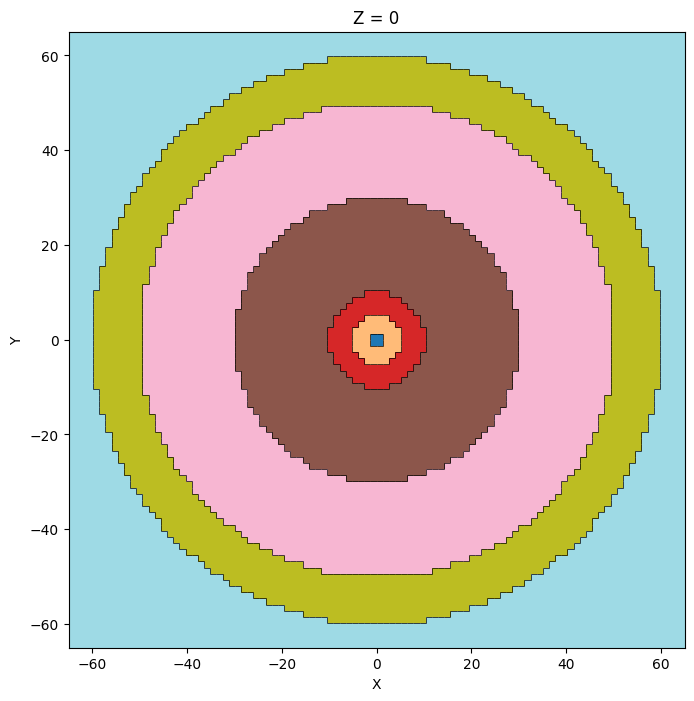

<Axes: title={'center': 'Z = 0'}, xlabel='X', ylabel='Y'>

In [7]:
model.plot(z=0, bounds=(-65, 65, -65, 65))

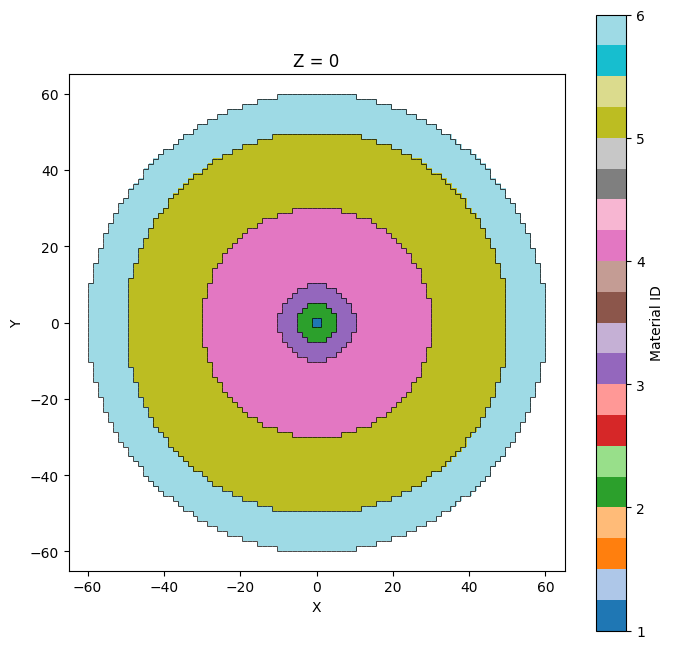

<Axes: title={'center': 'Z = 0'}, xlabel='X', ylabel='Y'>

In [7]:
model.plot(z=0, bounds=(-65, 65, -65, 65), by_material=True, show_colorbar=True)